In [3]:
#Depression Detection
#import the necessary modules

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import imghdr
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import numpy as np
import seaborn as sns
from tensorflow.keras.models import load_model

C:\Users\princ\AppData\Local\Temp\ipykernel_9372\3857041602.py:13: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
#define the base directory from where the images are iterated

data_dir = "D:\Depress"

In [5]:
#preprocessing(remove the images that do not belong to the defined extensions)

image_exts = ['jpeg','jpg', 'bmp', 'png']
num_obs = [0,0]
class_idx = -1
for image_class in os.listdir(data_dir):
    class_idx = class_idx + 1
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else:
                num_obs[class_idx] = num_obs[class_idx] + 1
        except Exception as e: 
            print('Issue with image {}: {}'.format(image_path, str(e)))

In [6]:
#displaying the no of image files and the no of classes

data = keras.utils.image_dataset_from_directory(data_dir)

Found 9964 files belonging to 2 classes.


In [7]:
#scaling and Labelling

scale = ImageDataGenerator(rescale=1./255) 

x = scale.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    batch_size=65,
    class_mode='binary')

Found 9964 images belonging to 2 classes.


In [8]:
# callback function to stop when the necessary condition is achieved

class Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99:  
            print("\nHurrah! We reached the goal. So sorry to say that its time to stop.")
            self.model.stop_training = True

In [9]:
#training the images using CNN

model = Sequential()

model.add(Conv2D(32,(3,3), activation = "relu", input_shape = (48,48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

callbacks = Callback()

history = model.fit(x,epochs = 100,callbacks = [callbacks])

history

C:\Users\princ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100


C:\Users\princ\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.4983 - loss: 0.6936
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5270 - loss: 0.6883
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6272 - loss: 0.6485
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6440 - loss: 0.6359
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6552 - loss: 0.6266
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6802 - loss: 0.6055
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6844 - loss: 0.5935
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7037 - loss: 0.5802
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7077 - loss: 0.5711
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7172 - loss: 0.5622
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.7217 - loss: 0.5535
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
# Can check how the model is using layers on the images

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 2, 2, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,453 (361.15 KB)

 Trainable params: 30,817 (120.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,636 (240.77 KB)

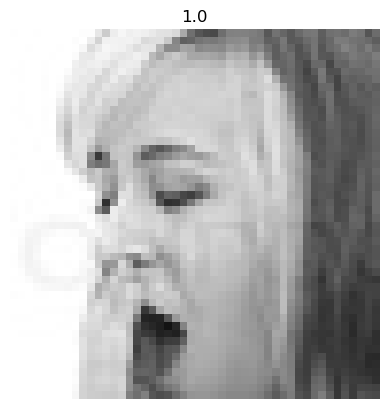

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


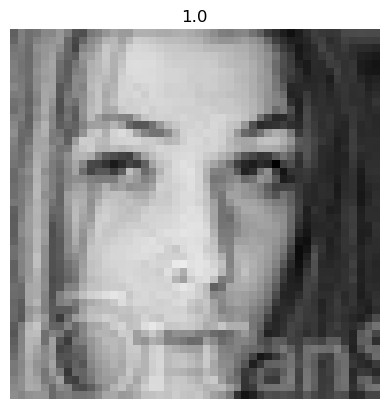

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


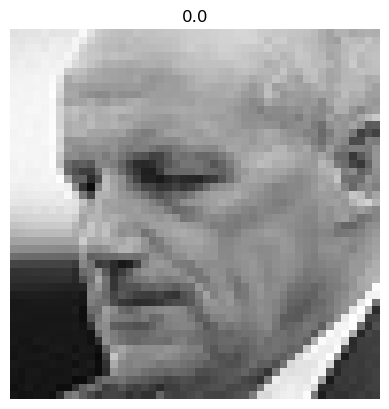

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sad


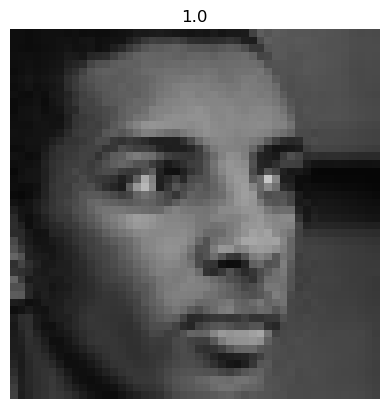

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


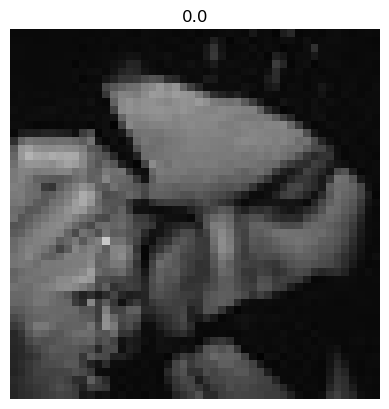

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sad


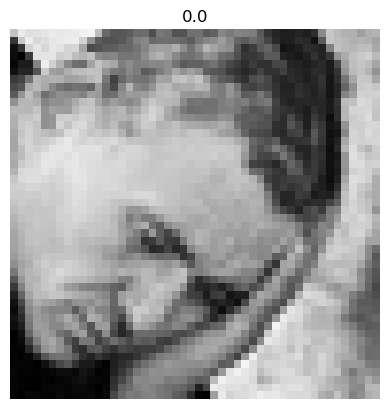

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sad


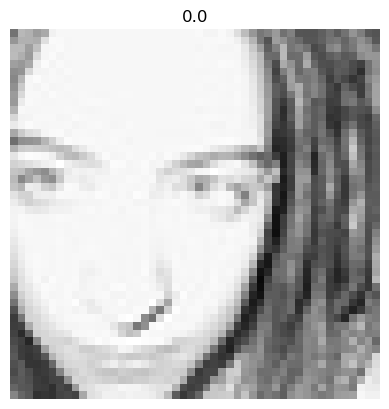

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sad


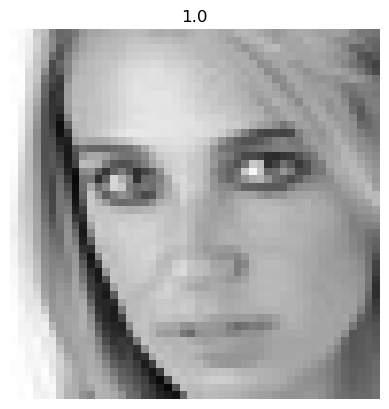

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


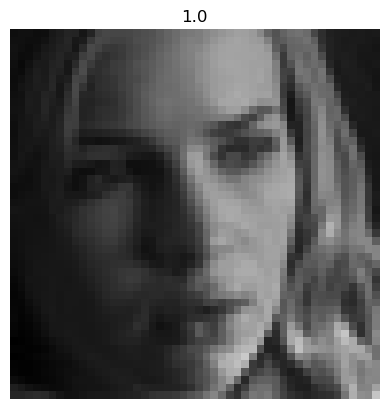

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


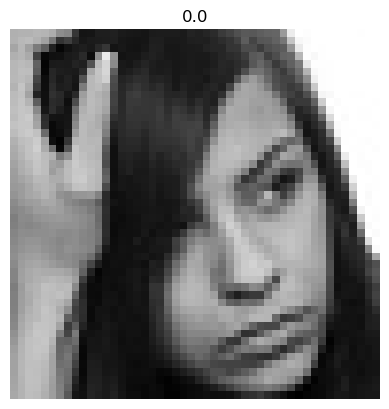

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sad


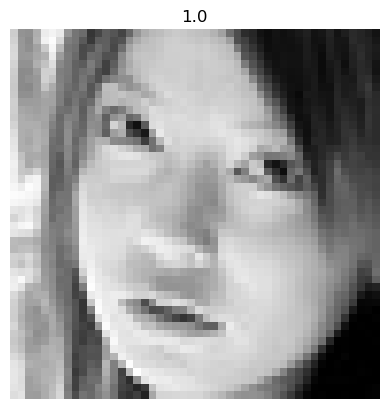

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Happy


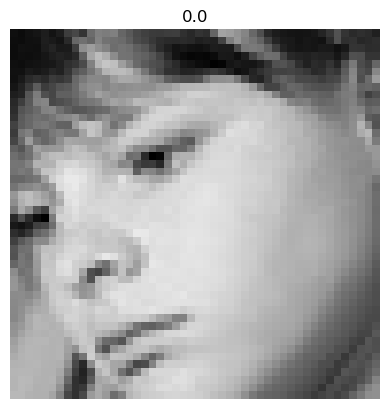

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sad


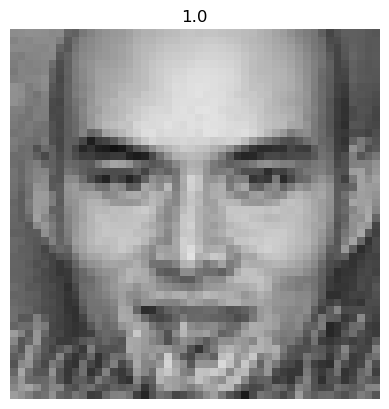

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


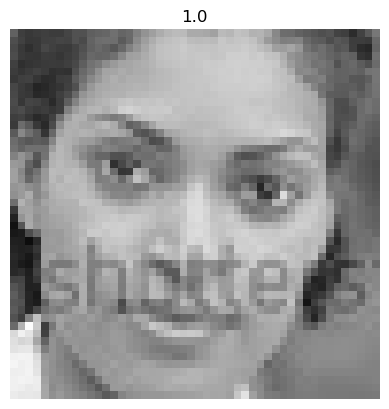

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Happy


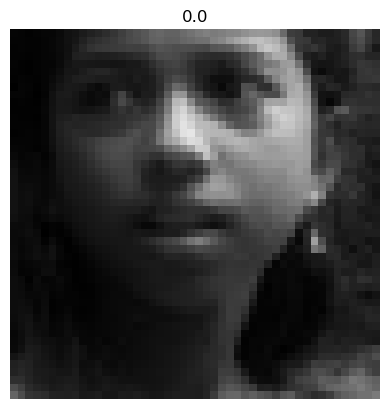

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sad


In [12]:
#Set the index so that you can set ur own to predict the images
#As the images are stored in a contiguous memory you can use the next function to iterate
#display the image and do the classification based on the sigmoid output

index = 0
batch_size = 15
for i in range(batch_size):
    batches = next(x)
    images, labels = batches
    image = images[index]
    label = labels[index]
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()
    image = image.reshape(1, 48, 48, 3)
    y = model.predict(image)
    if y > 0.5:
        la = "Happy"
    else:
        la = "Sad"
    print(la)

In [10]:
lala = []
batch_size1 = 9964
for i in range(batch_size1):
    batches = next(x)
    images, labels = batches
    image = images[index]
    label = labels[index]
    image = image.reshape(1, 48, 48, 3)
    y = model.predict(image)
    if y > 0.5:
        la = 1
    else:
        la = 0
    print(la)
    lala.append(la)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0


In [11]:
len(lala)

9964

In [12]:
y_true = x.labels
len(y_true)

9964

In [13]:
# Evaluation metrics

precision = precision_score(y_true, lala)
recall = recall_score(y_true, lala)
conf_matrix = confusion_matrix(y_true, lala)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:", conf_matrix)

Precision: 0.5100835200651864
Recall: 0.5026093938177438
Confusion Matrix: [[2577 2405]
 [2478 2504]]


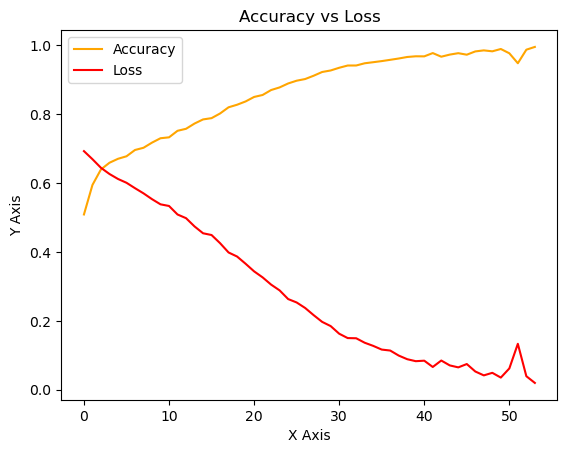

In [14]:
plt.plot(history.history["accuracy"], color="orange", label="Accuracy")
plt.plot(history.history["loss"], color="red", label="Loss")
plt.title('Accuracy vs Loss')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.legend()
plt.show()

In [3]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'plt' is not defined

In [25]:
model.save("C:\\Users\\princ\\OneDrive\\Desktop\\Something/classify.keras")

In [2]:
model = load_model("C:\\Users\\princ\\OneDrive\\Desktop\\Something/classify.keras")

def classify_face(image):
    image = cv2.resize(image, (48, 48))
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = image.astype(np.float32) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    if prediction > 0.5:
        return "Happy"
    else:
        return "Sad"

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        emotion_label = classify_face(face_roi)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━